In [2]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

1.Найдите первые 1000 цифр числа π после запятой. С помощью критерия хи-квадрат проверьте,
можно ли при уровне значимости 0.05 считать эти цифры случайными равномерными?

In [14]:
pi="1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201989"
pi=[int(i) for i in pi]
freqs=np.zeros(10)
for j in pi:
	for i in range(10):
		if j==i:
			freqs[i]+=1
			break
freqs/=1000
print(st.chisquare(freqs,[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]))
if st.chisquare(freqs,[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]).pvalue>0.95:
	print("Равномерны")
else:
	print("Нет")

Power_divergenceResult(statistic=0.00474, pvalue=0.9999999999999707)
Равномерны


2. Проверим однородность и независимость. Использовать данные из файла Priem.csv и встроенный
критерий.

In [9]:
data=pd.read_csv("/Users/mihailkondrasin/Desktop/Матпрак/CSVS/Priem.csv",encoding="UTF-16")
data.head()

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения
0,МУЖСКОЙ,388,90.0,98.0,5,0,1,Красноярский край,ГОРОД,24.09.1998,24,9
1,ЖЕНСКИЙ,351,84.0,87.0,0,0,2,Чувашская Респ,ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ,14.02.1997,14,2
2,ЖЕНСКИЙ,355,94.0,91.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,25.03.2000,25,3
3,ЖЕНСКИЙ,338,76.0,88.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,19.11.1999,19,11
4,МУЖСКОЙ,349,82.0,93.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,12.12.1999,12,12


(a) Ответить на вопрос - отличаются ли мальчики и девочки в плане успешности сдачи ЕГЭ?
Для этого попарно проверьте на однородность суммарные баллы, баллы по русскому, баллы
по математике.

In [117]:
k=int(input("NUMBER OF QUANTILES"))
mode=int(input())
if mode==1:
	obsmen=np.array(data.loc[data["Пол"]=="МУЖСКОЙ","Сумма.баллов"])
	obswom=np.array(data.loc[data["Пол"]=="ЖЕНСКИЙ","Сумма.баллов"])
if mode==2:
	obsmen=np.array(data.loc[data["Пол"]=="МУЖСКОЙ","ЕГЭ...матем."])
	obswom=np.array(data.loc[data["Пол"]=="ЖЕНСКИЙ","ЕГЭ...матем."])
if mode==3:
	obsmen=np.array(data.loc[data["Пол"]=="МУЖСКОЙ","ЕГЭ...рус.яз."])
	obswom=np.array(data.loc[data["Пол"]=="ЖЕНСКИЙ","ЕГЭ...рус.яз."])	
	
observed=np.concatenate((obswom,obsmen))
observedquantiles=np.nanquantile(observed,[i/k for i in range(k+1)])
mencounter=np.zeros(k)
for i in range(len(obsmen)):
	for j in range(k):
		if j==0:
			if obsmen[i]==observedquantiles[0]:
				mencounter[0]+=1
		if observedquantiles[j]<obsmen[i]<=observedquantiles[j+1]:
			mencounter[j]+=1
			break
womcounter=np.zeros(k)
for i in range(len(obswom)):
	for j in range(k):
		if j==0:
			if obswom[i]==observedquantiles[0]:
				womcounter[0]+=1
		if observedquantiles[j]<obswom[i]<=observedquantiles[j+1]:
			womcounter[j]+=1
			break
exp=(mencounter+womcounter)
chisq=0
print(mencounter)
print(womcounter)
print(exp)
for i in range(k):
	chisq+=(mencounter[i]-exp[i]*len(obsmen)/(len(obsmen)+len(obswom)))**2/(exp[i]*len(obsmen)/(len(obsmen)+len(obswom)))
	chisq+=(womcounter[i]-exp[i]*len(obswom)/(len(obsmen)+len(obswom)))**2/(exp[i]*len(obswom)/(len(obsmen)+len(obswom)))
if st.chi2.cdf(chisq,k-1)<0.95:
	print("Не отличаются")
else:
	print("Отличаются")

[258. 261. 233. 167.]
[130. 133. 125.  78.]
[388. 394. 358. 245.]
Не отличаются


(b) Правда ли, что оценки по математике и русскому независимы?

In [108]:
#H0: независимы
krus=int(input("No. of quantiles rus"))
kmat=int(input("No. of quantiles mat"))
obsrus1=data["ЕГЭ...рус.яз."]
obsmat1=data["ЕГЭ...матем."]
deleting=[]
for i in range(1390):
	if np.isnan(obsrus1[i]) or np.isnan(obsmat1[i]):
		deleting.append(i)
obsrus=[]
obsmat=[]
for i in range(1390):
	if not (i in deleting):
		obsrus.append(obsrus1[i])
		obsmat.append(obsmat1[i])
obsrus=np.array(obsrus)
obsmat=np.array(obsmat)
rusquant=np.nanquantile(obsrus,[(i+1)/krus for i in range(krus-1)])
rusquant=np.concatenate((np.zeros(1),rusquant,np.array([101])))
matquant=np.nanquantile(obsmat,[(i+1)/kmat for i in range(kmat-1)])
matquant=np.concatenate((np.zeros(1),matquant,np.array([101])))
obs=[]
for i in range(kmat):
	obs.append([0]*krus)
for i in range(1385):
	for j in range(krus):
		if rusquant[j]<=obsrus[i]<=rusquant[j+1]:
			placei=j
			break
	for j in range(kmat):
		if matquant[j]<=obsmat[i]<=matquant[j+1]:
			placej=j
			break
	obs[placej][placei]+=1
print(st.chi2_contingency(obs))

Chi2ContingencyResult(statistic=23.121214332014404, pvalue=0.00011975750338450888, dof=4, expected_freq=array([[188.85776173, 190.40577617, 156.73646209],
       [175.11624549, 176.55162455, 145.33212996],
       [124.02599278, 125.04259928, 102.93140794]]))


3.Построим критерий Кресси-Рида для проверки простой гипотезы о полиномиальном распредеении. Давайте сравним наши критерии для различных λ. Рассмотрите λ, равные −1, 0, 0.5, 1, 2. Поcтройте график p-value для каждого из них и выберите наиболее удачный критерий. Используйте исходное равномерное распределение (все pi равны) и неравномерное на свой вкус.

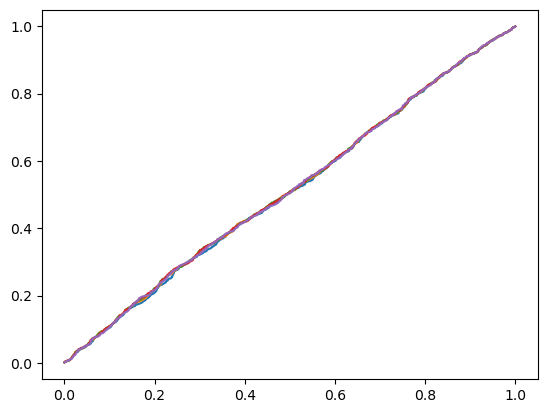

[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0.148 0.143 0.185 0.035 0.065 0.108 0.001 0.134 0.003]
[0.178 0

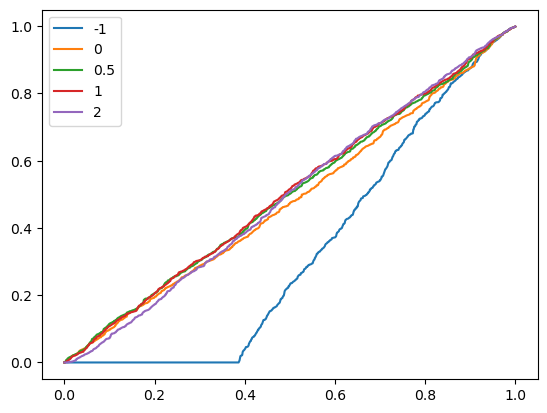

In [3]:
def there_are_zeros(p):
	for i in range(len(p)):
		if p[i]==0:
			return i
	return -1

string=input("NUMBER OF POSSIBLE OUTCOMES")
n=[int(string) if string!='' else 10][0]
string=input("NUMBER OF TRIALS")
k=[int(string) if string!='' else 1000][0]
punif=np.zeros(n)
result=k
for i in range(n):
	punif[i]=1/n
pvalminus1=[]
pvalzero=[]
pvalpointfive=[]
pvalone=[]
pvaltwo=[]
for i in range(1000):
	X=np.random.multinomial(n=k,pvals=punif)
	pvalminus1.append(st.power_divergence(X,lambda_=-1)[1])
	pvalzero.append(st.power_divergence(X,lambda_=0)[1])
	pvalpointfive.append(st.power_divergence(X,lambda_=0.5)[1])
	pvalone.append(st.power_divergence(X,lambda_=1)[1])
	pvaltwo.append(st.power_divergence(X,lambda_=2)[1])
x=np.linspace(0,1,1000)
plt.plot(x,np.sort(pvalminus1))
plt.plot(x,np.sort(pvalzero))
plt.plot(x,np.sort(pvalpointfive))
plt.plot(x,np.sort(pvalone))
plt.plot(x,np.sort(pvaltwo))
plt.show()

pprikol=np.zeros(n)
result=k
for i in range(n-1):
	pprikol[i]=np.random.randint(result)
	result-=pprikol[i]
pprikol[n-1]=result
shuffle(pprikol)
while (there_are_zeros(pprikol)!=-1):
	z=there_are_zeros(pprikol)
	rand=np.random.randint(max(pprikol)-1)
	for i in range(n):
		if pprikol[i]>max(1,rand):
			pprikol[z]+=max(1,rand)
			pprikol[i]-=max(1,rand)
			break
shuffle(pprikol)
pprikol=[int(i) for i in pprikol]
pprikol=np.array(pprikol)
pvalminus1=[]
pvalzero=[]
pvalpointfive=[]
pvalone=[]
pvaltwo=[]
for i in range(1000):
	X=np.random.multinomial(n=k,pvals=(pprikol/k))
	pvalminus1.append(st.power_divergence(X,f_exp=pprikol,lambda_=-1)[1])
	pvalzero.append(st.power_divergence(X,f_exp=pprikol,lambda_=0)[1])
	pvalpointfive.append(st.power_divergence(X,f_exp=pprikol,lambda_=0.5)[1])
	pvalone.append(st.power_divergence(X,f_exp=pprikol,lambda_=1)[1])
	pvaltwo.append(st.power_divergence(X,f_exp=pprikol,lambda_=2)[1])
x=np.linspace(0,1,1000)
plt.plot(x,np.sort(pvalminus1),label='-1')
plt.plot(x,np.sort(pvalzero),label='0')
plt.plot(x,np.sort(pvalpointfive),label='0.5')
plt.plot(x,np.sort(pvalone),label='1')
plt.plot(x,np.sort(pvaltwo),label='2')
plt.legend()
plt.show()
